In [1]:
# Pandas for data reading and writing
import pandas as pd
# Numpy for Numerical operations
import numpy as np
# Import ColumnTransformer
from sklearn.compose import ColumnTransformer
# Import Pipeline
from sklearn.pipeline import Pipeline
# Import SimpleImputer
from sklearn.impute import SimpleImputer
# Import StandardScaler, OneHotEncodr and OrdinalEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
# Import Random Forest for Classification
from sklearn.ensemble import RandomForestClassifier
# Import train_test_split 
from sklearn.model_selection import train_test_split
# Import GridSearch
from sklearn.model_selection import GridSearchCV

In [3]:
# Read the train data
data = pd.read_csv("train.csv")

In [4]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


## Statistical data 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [38]:
#data['Cabin'].value_counts()
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [39]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [45]:
data['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [46]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [47]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [48]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [49]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [50]:
data['Survived'].unique()

array([0, 1], dtype=int64)

## Missing value

In [51]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

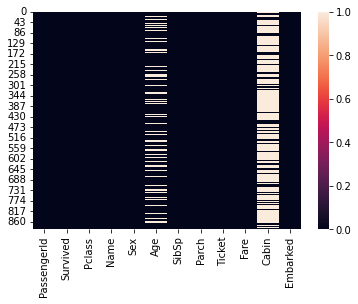

In [52]:
# Show null value in heatmap
import seaborn as sns
sns.heatmap(data.isnull())

## data Visualisation

c:\users\nikhatara\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

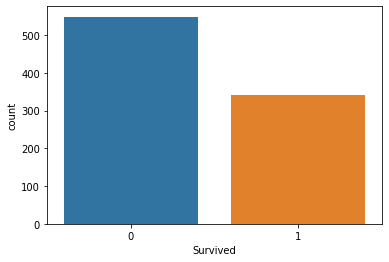

In [53]:
sns.countplot(data['Survived'])

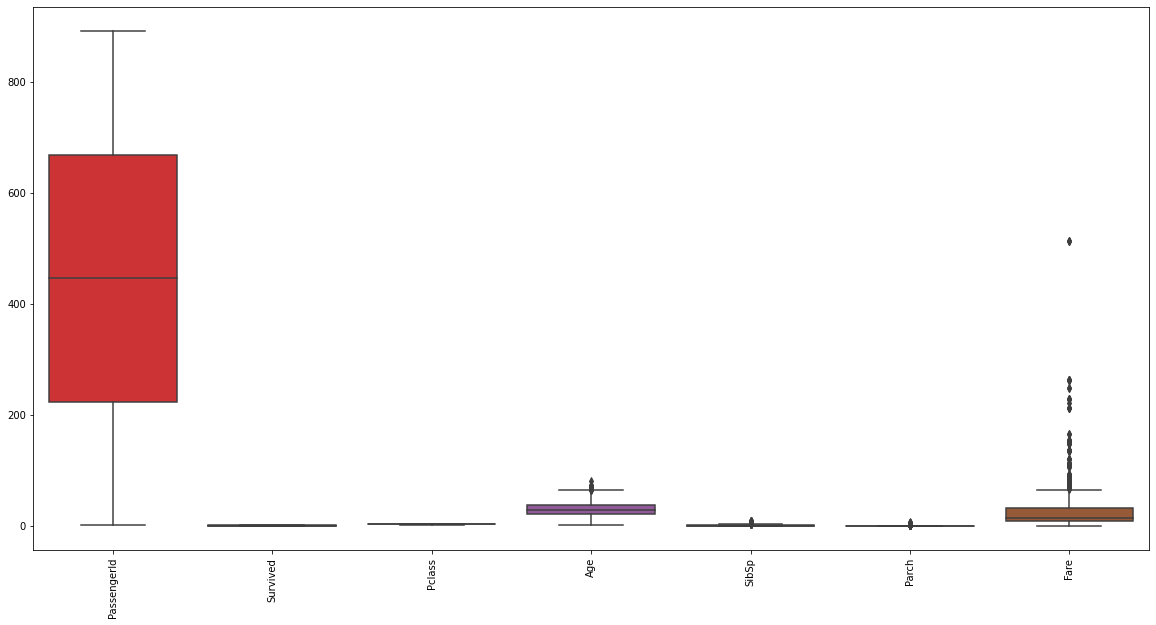

In [54]:
#Outlier 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.boxplot(data = data,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

c:\users\nikhatara\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


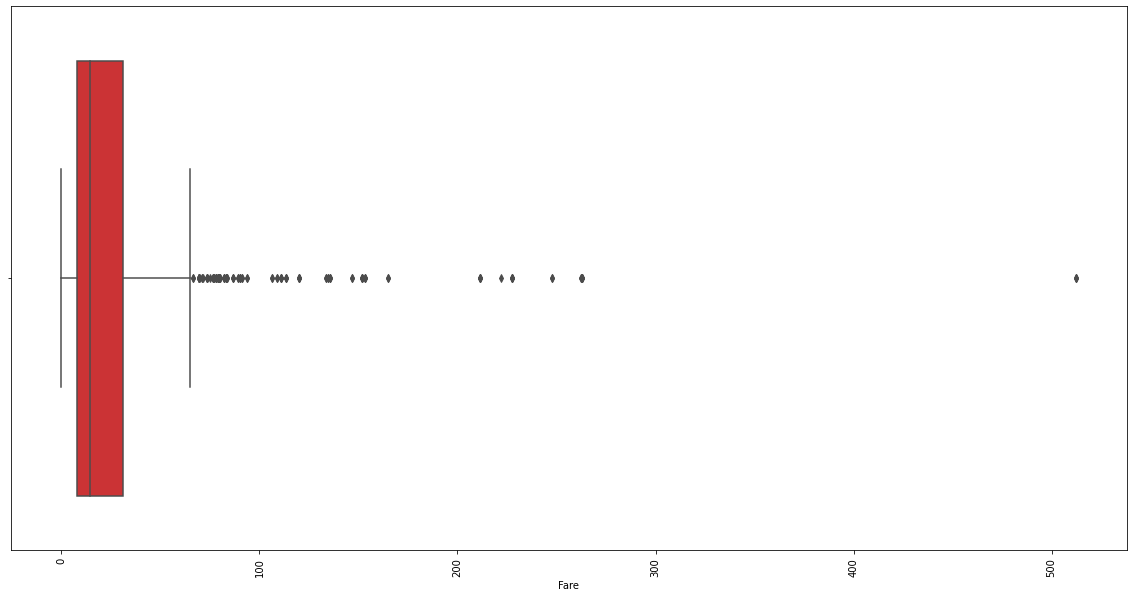

In [55]:
#Outlier 
plt.figure(figsize=(20,10))
sns.boxplot(data['Fare'],data = data,palette = "Set1")
plt.xticks(rotation=90)
plt.show()

## Splitting Data

In [56]:
# Split the data into predictors and target
# Note :: We will remove Survived column as it won't affect our model
X = data.drop(['Survived', 'Name','PassengerId','Ticket','Cabin'], axis = 1)
y = data['Survived']

# Split the data into train and test chunks 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [60]:
X.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.25,S


## Continuous Features Handling

In [61]:
# Now, we will create a pipline for the numeric features
# Define a list with the numeric features
numeric_features = ['Age', 'Fare']
# Define a pipeline for numer"ic features
numeric_features_pipeline = Pipeline(steps= [
    ('imputer', SimpleImputer(strategy = 'median')), # Impute with median value for missing
    ('scaler', StandardScaler())                     # Conduct a scaling step
])

## Categorical Features Handling

In [62]:
# Now, we will create a pipline for the categorical features
# Define a list with the categorical features
categorical_features = ['Embarked', 'Sex']
# Define a pipeline for categorical features
categorical_features_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value = 'missing')), # Impute with the word 'missing' for missing values
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))     # Convert all categorical variables to one hot encoding
])

## Ordinal Features Handling

In [63]:
# Now, we will create a pipline for the ordinal features
# Define a list with the ordinal features
ordinal_features = ['Pclass']
# Define a pipline for ordinal features 
ordinal_features_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories= [[1, 2, 3]]))
])

## Construct a comprehended preprocessor

In [64]:
# Now, we will create a transformer to handle all columns
preprocessor = ColumnTransformer(transformers= [
    # transformer with name 'num' that will apply
    # 'numeric_features_pipeline' to numeric_features
    ('num', numeric_features_pipeline, numeric_features),
    # transformer with name 'cat' that will apply 
    # 'categorical_features_pipeline' to categorical_features
    ('cat', categorical_features_pipeline, categorical_features),
    # transformer with name 'ord' that will apply 
    # 'ordinal_features_pipeline' to ordinal_features
    ('ord', ordinal_features_pipeline, ordinal_features) 
    ])

## Prediction Pipeline

In [65]:
# Now, we will create a full prediction pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                     ('classifier', RandomForestClassifier(n_estimators = 120, max_leaf_nodes = 100))])

## Pipeline Training

In [66]:
# Let's fit our classifier
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncod

In [67]:
y_pred = clf.predict(X_test)

In [68]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0], dtype=int64)

In [69]:
# Now, let's construct our parameters grid for the search
param_grid = {
    # Search between mean and median for missing numerical values handling
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    # Search about best number of estimator in our random forest model
    'classifier__n_estimators': [100, 120, 150, 170,],
    # Search about max_leaf_nodes in random forest model 
    'classifier__max_leaf_nodes' : [100, 120, 150]
}

# GridSearch for our classifier using our previously created param_grid with 10 cross validations
grid_search = GridSearchCV(clf, param_grid, cv=10)
# Fit our grid search object
grid_search.fit(X_train, y_train)

print(("Best random forest from grid search: %.3f"
       % grid_search.score(X_test, y_test)))
print('The best parameters of Simple Imputer and C are:')
print(grid_search.best_params_)

Best random forest from grid search: 0.803
The best parameters of Simple Imputer and C are:
{'classifier__max_leaf_nodes': 100, 'classifier__n_estimators': 170, 'preprocessor__num__imputer__strategy': 'median'}


In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       134
           1       0.75      0.76      0.76        89

    accuracy                           0.80       223
   macro avg       0.79      0.80      0.80       223
weighted avg       0.80      0.80      0.80       223



In [71]:
sum(y_pred == y_test) / len(y_pred)

0.8026905829596412

c:\users\nikhatara\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


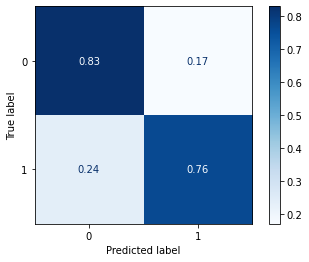

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid_search, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show()

In [73]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)
print("Accuracy of RFC:", accuracy)
print("Precision of RFC:", precision)
print("Recall of RFC:", recall)
print("F1 Score of RFC:", f1_score)

Accuracy of RFC: 0.8026905829596412
Precision of RFC: 0.7472527472527473
Recall of RFC: 0.7640449438202247
F1 Score of RFC: 0.7555555555555554


In [74]:
import pickle 
pickle.dump(grid_search,open('Titanic_rfc_pipe_SC.pkl','wb'))

In [75]:
model = pickle.load(open('Titanic_rfc_pipe_SC.pkl','rb'))

In [76]:
model.predict(X_test)

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0], dtype=int64)

array([0], dtype=int64)

In [78]:
X.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.25,S
